In [2]:
USER_API_KEY = "SWt9OtcNKRv9RTetLoGPg9MsmQco0o66"

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


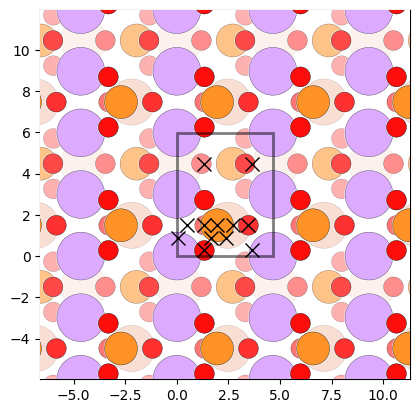

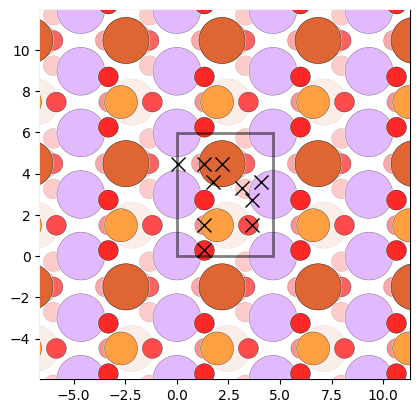

In [4]:
from pymatgen.analysis.adsorption import  *
from pymatgen.core.surface import Slab, SlabGenerator, generate_all_slabs, Structure, Lattice, ReconstructionGenerator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.structure import Structure
from pymatgen.ext.matproj import MPRester
from matplotlib import pyplot as plt
from pymatgen.io.vasp.inputs import Poscar

# get the materials id
with MPRester(USER_API_KEY) as mpr:
    mp_id = "mp-19017"
    # get structure by MP
    struct = mpr.get_structure_by_material_id(mp_id)
    # SpacegroupAnalyzer get conventional_standard_structure
    struct = SpacegroupAnalyzer(struct).get_conventional_standard_structure()
    # SlabGenerator(structure, miler_index, slab_size, vacuum_size)
    slab = SlabGenerator(struct,(0, 0, 1), min_slab_size=8.0, min_vacuum_size=15.0, center_slab=True)

    # slab.get_slabs() 遍历slab每一层 ； bonds = {('P','O'):3} 限制条件：P-O键3埃以内不取该层
    for n, slabs in enumerate(slab.get_slabs(bonds = {('P','O'):3})):
        slabs.make_supercell([[1,0,0],[0,1,0],[0,0,1]])
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plot_slab(slabs, ax, adsorption_sites=True)
        plt.savefig(str(n) + '-LiFePO4-001.png', dpi=300)
        open('POSCAR' + mp_id + '-' + str(n), 'w').write(Poscar(slabs).get_string())